Here's me running bowtie:

be131-19@meowth:~$ bowtie2 -p 4 --very-fast  --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq
1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate

Q) What percentage of your sequencing library came from contaminating DNA?
A) 8.57%

Aligning unaligned.fastq to the Shewanella Oneidensis reference genome:

be131-19@meowth:~$ bowtie2 -p 4 --very-fast  --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unaligned.fastq -S output2.sam --un unaligned2.fastq
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    299560 (29.13%) aligned 0 times
    687571 (66.86%) aligned exactly 1 time
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate

Using --very-sensitive:

be131-19@meowth:~$ bowtie2 -p 4 --very-sensitive  --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unaligned.fastq -Soutput2.sam --un unaligned2.fastq
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    298112 (28.99%) aligned 0 times
    688180 (66.92%) aligned exactly 1 time
    42087 (4.09%) aligned >1 times
71.01% overall alignment rate

My samtools commands:

samtools view -b output.sam > my_alignment.bam
samtools sort my_alignment.bam > my_alignment.sorted.bam
samtools index my_alignment.sorted.bam
samtools depth my_alignment.sorted.bam > pileup.tab

In [1]:
import csv 
with open("pileup.tab") as inp:
    a = list(zip(*(line.strip().split('\t') for line in inp)))

In [5]:
positions = []
for x in a[1]:
    positions.append(int(x))

depth_cov = []
for x in a[2]:
    depth_cov.append(int(x))
    

print("max coverage: " + str(max(depth_cov)))
print("min coverage " + str(min(depth_cov)))
print("mean coverage " + str(sum(depth_cov)/len(depth_cov)))

max coverage: 269
min coverage 1
mean coverage 36.95638840970833


Me plotting:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = positions
y_values= depth_cov
plt.scatter(x_values, y_values, s = 1)
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.title("Depth of Coverage vs Position in Genome")
plt.show()

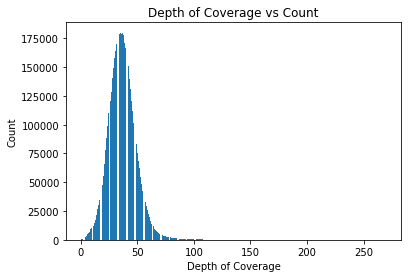

In [7]:
depth_axis = range(1, max(depth_cov) + 1)


def count(num, lst):
    i,c = 0, 0
    while i < len(lst):
        if lst[i] == num:
            c += 1
        i += 1
    return c
count_axis = []        
for x in depth_axis:
    count_axis.append(count(x, depth_cov))

plt.bar(depth_axis, count_axis)
plt.xlabel("Depth of Coverage")
plt.ylabel("Count")
plt.title("Depth of Coverage vs Count")
plt.show()